In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

In [2]:
# https://www.robots.ox.ac.uk/~vgg/data/pets/

In [3]:
root_path = "/BiO/github/big_files/cv"

In [19]:
df = pd.read_csv(root_path + '/annotations/list.txt', comment= '#', delimiter= ' ', header = None)
df.columns = ["file_name", 'id', "species", "breed"]

In [6]:
df.head()

,file_name,id,species,bread
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [7]:
print(df.species.value_counts())

2    4978
1    2371
Name: species, dtype: int64


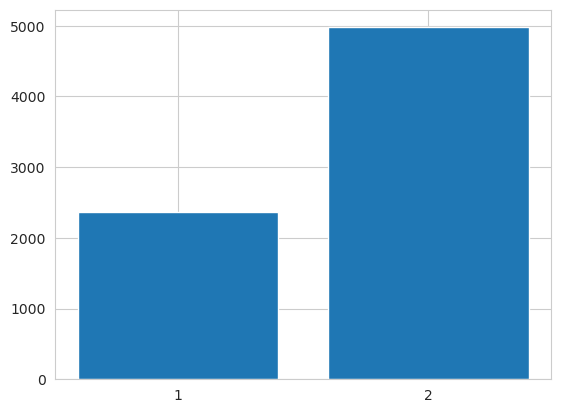

In [12]:
value_counts = df.species.value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

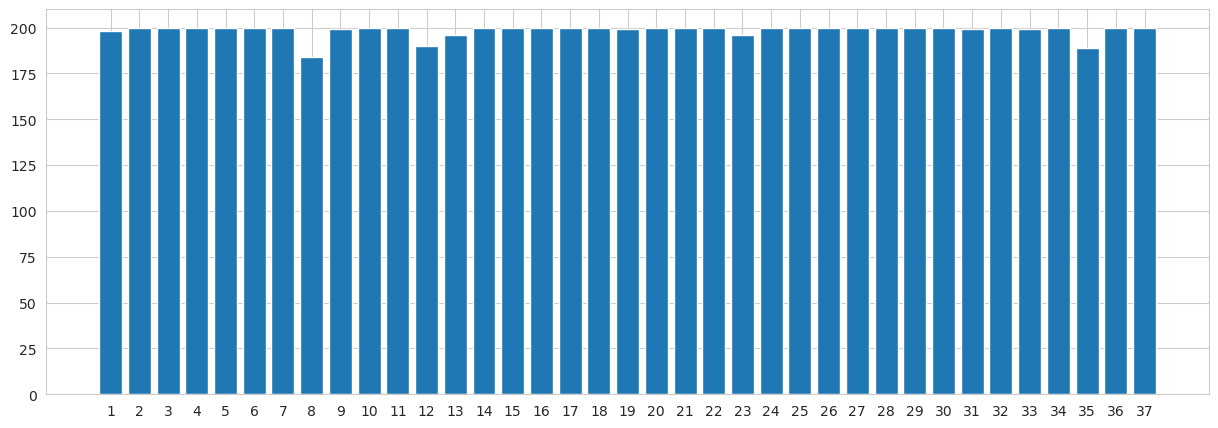

In [15]:
plt.figure(figsize=(15,5))
value_counts = df.id.value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

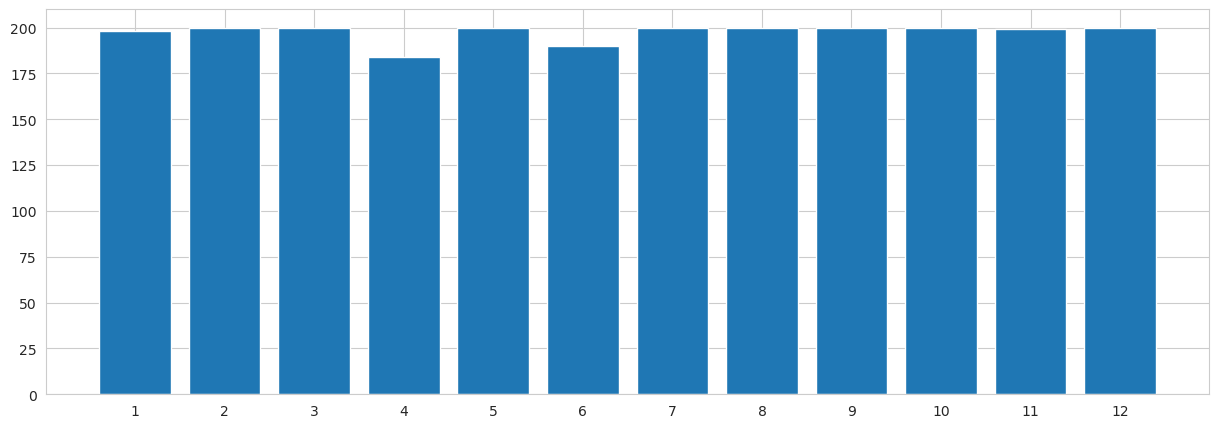

In [20]:
plt.figure(figsize=(15,5))
value_counts = df[df.species ==1]["breed"].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

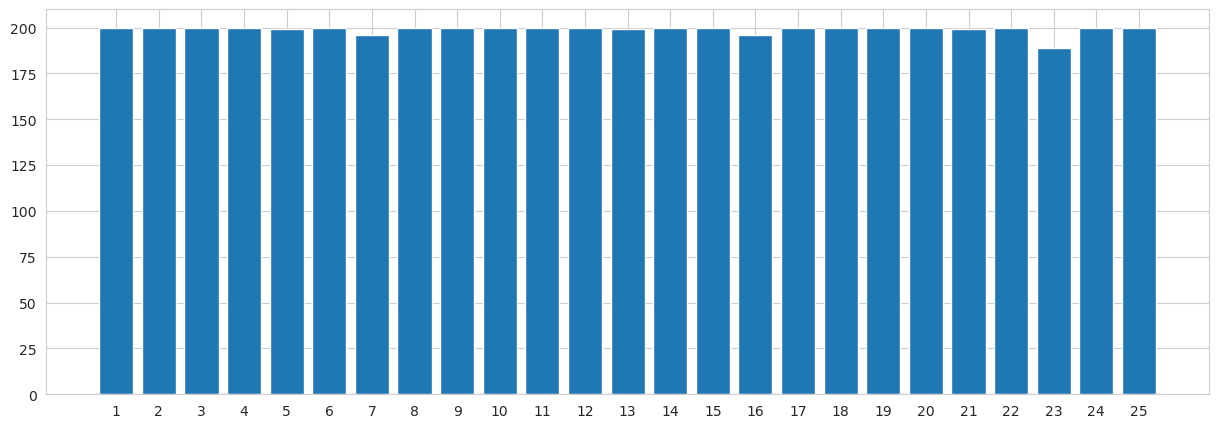

In [21]:
plt.figure(figsize=(15,5))
value_counts = df[df.species == 2 ]["breed"].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values )

plt.show()

In [28]:
import os
from glob import glob

In [29]:
image_dir = "/BiO/github/big_files/cv/images/"
bbox_dir = "/BiO/github/big_files/cv/annotations/xmls/"
seg_dir = "/BiO/github/big_files/cv/annotations/trimaps/"

In [32]:
image_files = glob(image_dir + "*.jpg")
len(image_files)

7390

In [34]:
image_files[:5]

['/BiO/github/big_files/cv/images/Abyssinian_1.jpg',
 '/BiO/github/big_files/cv/images/Abyssinian_10.jpg',
 '/BiO/github/big_files/cv/images/Abyssinian_100.jpg',
 '/BiO/github/big_files/cv/images/Abyssinian_101.jpg',
 '/BiO/github/big_files/cv/images/Abyssinian_102.jpg']

In [35]:
seg_files = glob(seg_dir + "*.png")
len(seg_files)

7390

In [38]:
bbox_files = glob(bbox_dir + "*.xml")
len(bbox_files)

3686

In [41]:
import cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

In [ ]:
image_path = image_files[110]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
tree = et.parse(bbox_path)

xmin = float(tree.find(''))